# Zadanie 1

## Wczytywanie potrzebnych bibliotek


In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


## Ustawianie globalnych danych

#### Ustawiam tutaj, dane które są uniwersalne, dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [23]:

np.random.seed(seed=123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
stopnie_swobody = range(1, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10, 20, 50, 100, 200]
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 500


## Funkcja symulacjii

### Funkcja, która służy wyłącznie do symulacji danego testu 
#### Za argumenty przyjmuje liczbe danych, stopień swobody oraz test dla jakiego ma przeprowadzić symulacje
#### Zwraca odsetek odrzucenia hipotezy zerowej 

In [24]:
def symulacja(l_danych,stopien_s,test):

    # W tej zmiennej będę sumował liczbę razy, gdy dla danego zestawu danych odrzuciłem hipotezę zerową
    suma_odrzucenia_H0 = 0

    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z rozkładu t-Studentao l_danych wielkości i stopien_s stopni swobody
        probka = stats.t.rvs(stopien_s, size=l_danych)

        # Standaryzacja danych
        stand_probka = (probka-np.mean(probka))/np.std(probka)

        # Tutaj jest moment decyzyjny, gdzie decyduje który test teraz symulowany

        # Test Shapiro-Wilka
        if test == "shapiro":
            # Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
            # Hipoteze zerowa co znaczy ze zwiekszamy zmienna sumujaca odrzucenie H0 o 1
            if stats.shapiro(stand_probka).pvalue < poziom_istotnosci:
                suma_odrzucenia_H0 += 1

        # Test Chi-kwadrat
        elif test == "chi":
            # Dziele dane na przedziały
            freq,temp = np.histogram(stand_probka, bins='auto')
            if stats.chisquare(freq).pvalue < poziom_istotnosci:
                suma_odrzucenia_H0 += 1

        # Test Kołgomorova
        elif test == "kolmog":
            if stats.kstest(stand_probka, 'norm').pvalue < poziom_istotnosci:
                suma_odrzucenia_H0 += 1

    return suma_odrzucenia_H0

## Funckja Przed-symulacyjna

#### Funkcja, przygotowująca liczbę danych, stopnień swobody oraz test dla którego będziemy prowadzić symulacje, nastpęnie zapisująca wynik(odsetek, gdzie odrzuciliśmy hipotezę zerową).
#### Zwraca tablice przechowująca wyniki dla danego stopnia swobody oraz dla danej liczby danych. 


In [25]:
def symulacja_testu(test):

    # Tablica, która zbierze mi moce testów
    moce_testow = []

    # Zaczynamy symulacje
    # Dla każdej liczby danych
    for l_danych in liczby_danych:
        # Tworzę nową tablicę która będzie przechowywała
        # moce testu dla n-tej liczby danych
        moce_n_testu = []

        # Dla każdego stopnia swobody
        for stopien_s in stopnie_swobody:
            # Symulacja, dla danego zestawu danych
            odsetek_odrzucenia_H0 = symulacja(l_danych,stopien_s,test)/liczba_symulacji

            # Dodajemy odsetek odrzucenia dla danego stopnia swobody i danej liczby danych i idziemy dalej, zwiększając 
            # stopnie swobody
            moce_n_testu.append(odsetek_odrzucenia_H0)

        # Teraz dodajemy moce n-tego testu do głownej tablicy przechowującej moce testu
        moce_testow.append(moce_n_testu)

    # Symulacja zakonczona i zwracam moce testów

    return moce_testow


## Symulowanie 

In [26]:
# Symulacja Testu Shapiro-Wilka

moc_shapiro = symulacja_testu("shapiro")

# Symulacja Testu Kolgomorova

moc_kolgom = symulacja_testu("kolmog")

# Symulacja Testu Chi-kwadrat

moc_chi = symulacja_testu("chi")


## Wnioskowanie 

### Test Shapiro-Wilka 

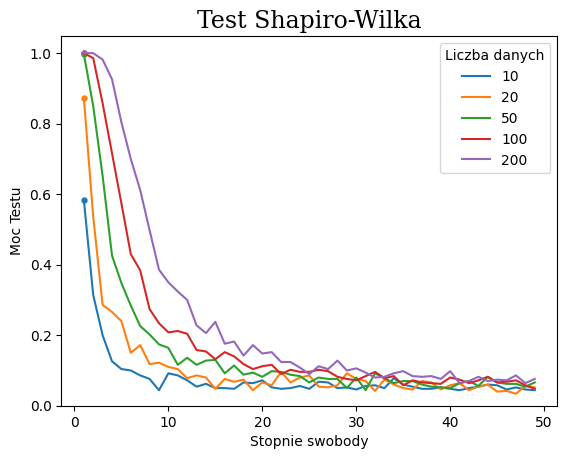

In [27]:
# Tworzę podstawkę do wykresu 
wykres_shapiro = plt.figure()


# Dodaje dane do wykresu 
for i,moc in enumerate(moc_shapiro):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    # Dodaję punkt dla pierwszego elementu
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 


# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Shapiro-Wilka",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(0)
plt.show()

### Wnioski

Wraz ze wzrostem liczby danych wzrasta także moc testu, aczkolwiek wraz ze wzrostem stopni liczby swobody w rozkładzie t-studenta moc testu spada i dąży do wartości 0.05(co jest równe poziomowi istotności ustalonemu dla tego tesu). Z wykresu widzimy, że moc testu słabnie hiperbolicznie, dla stopnii swobody > 30, możemy zauważyć, że liczba danych przestaje mieć znaczenie, a dla stopni swobody > 45, liczba danych nie ma już żadnego znaczenia dla mocy testu. Test wydaje się być miarodajny i wiarygodny, ze względu na to, że wraz ze wzrostem stopni swobody w rozkładzie t-studenta możemy estymować go rozkładem normalnym. Umowna wartość od której możemy go estymować to n > 30, co zgadzałoby się z wykresem i wcześniejszym rozumowaniem 


### Test Kołgomorowa

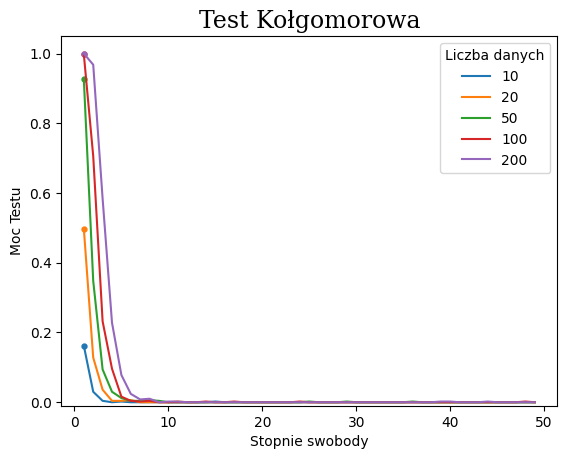

In [28]:
# Tworzę wykres

wykres_kolgo = plt.figure()

# Dodaje dane do wykres
for i,moc in enumerate(moc_kolgom):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 



# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Kołgomorowa",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(-0.01)
plt.show()

## Wnioski 

Wraz ze wzrostem liczby danych wzrasta także moc testu, aczkolwiek wraz ze wzrostem stopni liczby swobody w rozkładzie t-studenta moc testu spada i dąży do 0. Z wykresu widzimy, że moc testu maleje bardzo szybko i już dla 10 stopni swobody jest bliski 0. Wydaje się, że test jest miarodajny i w miarę wiarygodny tylko dla: 

1. dużej liczby stopni swobody(powyżej 100) 
2. małej liczby stopni swobody, ale dużej liczbie danych(powyżej 50)

Wynika to z faktu, że Test Kołgomorowa, jest bardziej ogólny niż test Shapiro-Wilka.

### Test Chi-kwadrat

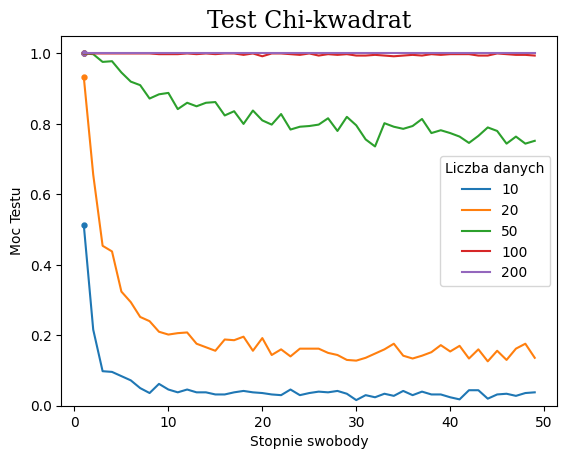

In [29]:
# Tworzę wykres

wykres_chi = plt.figure()

# Dodaje dane do wykresu
for i,moc in enumerate(moc_chi):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Chi-kwadrat",fontdict=font_title)
plt.legend(title="Liczba danych",loc="center right")
plt.ylim(0,)
plt.show()

## Wnioski 

Z wykresu możemy zobaczyć, że od pewnej wielkości liczby danych(>= 100) test ignoruje wartość stopni swobody i przyjmuje wartość 1, co czyni go nie wiarygodnym dla dużej liczby danych, bo wiemy, że moc testu powinna maleć. Sytuacja zaczyna się poprawiać dla liczby danych <= 50, bo test zaczyna powoli ale maleć. Ogólnie możemy powiedzieć, że czym mniejsza liczba danych tym ten test jest bardziej miarodajny i wiarygodny, co nie oznacza, że jest to dobry poziom wiarygodności. Wynika to z faktu, że jest to najogólnijeszy test w całym zestawieniu. 

## Porównanie 

Wyliczę średnią moc każdego z testów dla każdego stopnia swobody, co pomoże pokazać mi różnice.

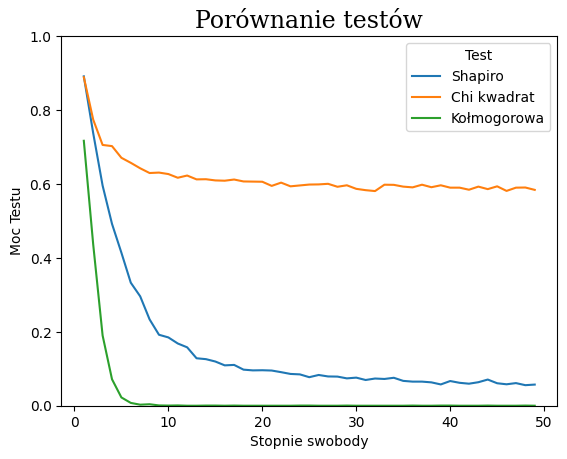

In [45]:
# Tworzenie tablic w których będę trzymał średnie 
srednia_moc_shapiro = np.zeros(len(stopnie_swobody))
srednia_moc_chi = np.zeros(len(stopnie_swobody))
srednia_moc_kol = np.zeros(len(stopnie_swobody))

# Sumowanie mocy 
for i in range(len(moc_shapiro)):
    srednia_moc_shapiro += moc_shapiro[i]
    srednia_moc_chi += moc_chi[i]
    srednia_moc_kol += moc_kolgom[i]

# Wyliczanie średnia 
srednia_moc_shapiro /= len(moc_shapiro)
srednia_moc_chi /= len(moc_chi)
srednia_moc_kol /= len(moc_kolgom)

# Tworzenie wykresu 
w = plt.figure()
plt.plot(stopnie_swobody,srednia_moc_shapiro,label="Shapiro")
plt.plot(stopnie_swobody,srednia_moc_chi,label = "Chi kwadrat")
plt.plot(stopnie_swobody,srednia_moc_kol,label="Kołmogorowa")
plt.ylim(0,1)
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Porównanie testów",fontdict=font_title)
plt.legend(title="Test")
plt.ylim(0,)
plt.show()

# Wnioski 

Jak widzimy na wykresie test Shapiro-Wilka jest najbardziej monotonicznym testem w tym zestawie. Natomiast test Kołmogorowa idzie w jedną skrajność, jaką jest bardzo szybki spadek i dążenie do 0. Test Chi kwadrat popada w drugą skrajność jaka jest bardzo wolny spadek, a wręcz asymptotyczne dążenie do niewyjaśnialnej wartości odbiegającej od 0.